In [29]:
import torch
import torchvision
import sklearn
import numpy as np
import pandas as pd
import time
import scipy
import sys
import glob
import cv2 
import os
import PIL
import multiprocessing as mp
import contextlib
import io
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
from sklearn.model_selection import train_test_split

#pytorch and torchvision imports
from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import Sampler
from torchvision import transforms
from torchvision.models import resnet50

#for displaying images from dataset
from IPython.display import Image

In [23]:
!ls

archive.zip                   test.csv
breast-cancer-detection.ipynb train.csv
png_train_images


In [30]:
import os

folder_path = 'png_train_images/'  
files = os.listdir(folder_path)
print(files)

['1069', '48123', '19781', '65009', '12967', '9036', '38066', '37812', '18839', '17871', '38402', '2288', '23876', '8574', '43369', '44970', '58513', '25947', '57769', '39716', '5059', '55802', '28456', '49461', '63138', '59297', '22508', '54588', '763', '49005', '551', '8110', '55668', '7964', '16392', '43190', '30462', '45267', '10257', '11385', '17072', '42270', '12500', '26735', '54315', '58980', '40143', '17416', '29319', '27283', '54771', '12164', '61496', '26351', '42426', '32751', '10401', '21346', '15173', '20294', '25520', '58974', '63335', '21180', '14267', '20052', '5630', '64110', '16530', '46240', '55657', '19578', '7355', '16702', '41257', '16366', '28469', '3391', '27421', '63563', '4988', '5066', '11371', '41401', '14603', '37481', '22361', '34204', '936', '50741', '27613', '64128', '12994', '57138', '38095', '5608', '14851', '63903', '27841', '13248', '50913', '8325', '19772', '61668', '14409', '44379', '28451', '22359', '58514', '38637', '24268', '10861', '16198', '2

In [31]:
from pathlib import Path

df = pd.read_csv("train.csv")

image_path  = Path('png_train_images/')

path = []
for i in tqdm(range(len(df))):
    row = df.iloc[i, :]
    filename = str(row.patient_id) + "/" + str(row.image_id) + ".png"
    path.append(image_path /  filename )
df["path"] = path

  0%|          | 0/54706 [00:00<?, ?it/s]

In [32]:
df

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case,path
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False,png_train_images/10006/462822612.png
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False,png_train_images/10006/1459541791.png
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False,png_train_images/10006/1864590858.png
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False,png_train_images/10006/1874946579.png
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True,png_train_images/10011/220375232.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54701,1,9973,1729524723,R,MLO,43.0,0,0,0,1.0,0,C,49,False,png_train_images/9973/1729524723.png
54702,1,9989,63473691,L,MLO,60.0,0,0,0,NaN,0,C,216,False,png_train_images/9989/63473691.png
54703,1,9989,1078943060,L,CC,60.0,0,0,0,NaN,0,C,216,False,png_train_images/9989/1078943060.png
54704,1,9989,398038886,R,MLO,60.0,0,0,0,0.0,0,C,216,True,png_train_images/9989/398038886.png


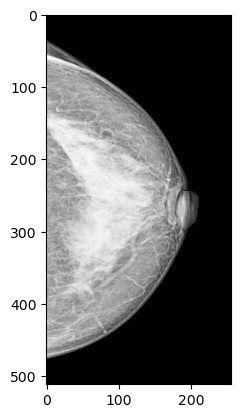

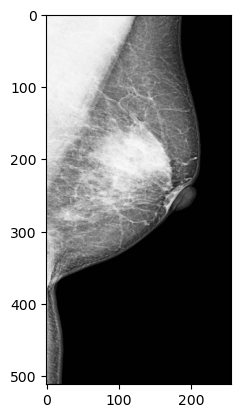

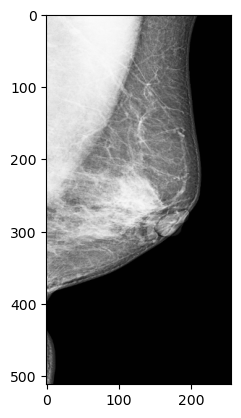

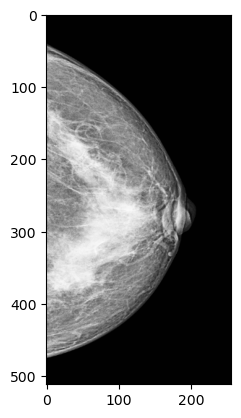

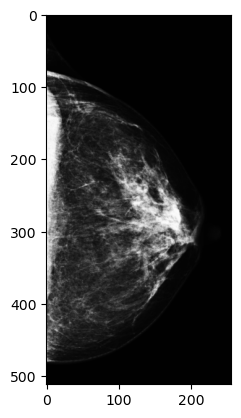

In [33]:
for i in range(5):
    img_read = cv2.imread(str(df["path"][i]), cv2.IMREAD_UNCHANGED)
    plt.imshow(img_read)
    plt.show()

In [34]:
total_images = len(df)
print(total_images)
patient_num = len(df["patient_id"].unique())
print(patient_num)

54706
11913


In [35]:
df["cancer"].unique()

array([0, 1])

In [37]:
dd = df[df["cancer"]==1]

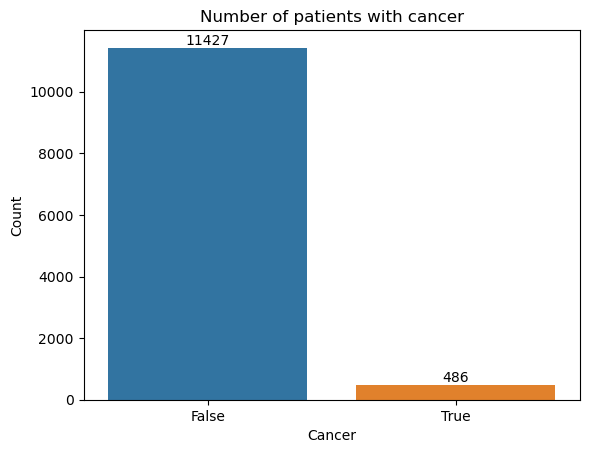

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

def has_cancer(c):
    return c > 0

cancer_per_patient = df.groupby("patient_id")["cancer"].sum().apply(has_cancer)

ax = sns.countplot(x=cancer_per_patient)
ax.bar_label(ax.containers[0])

plt.xlabel("Cancer")
plt.ylabel("Count")
plt.title("Number of patients with cancer")

plt.show()


Text(0.5, 1.0, 'Patient ages')

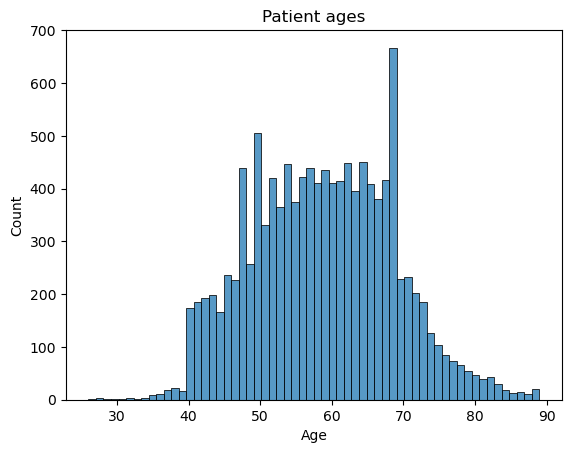

In [39]:
def get_age(a):
    return a[0]
    
patient_age = df[df['age'].isnull()==False].groupby("patient_id").age.unique().apply(lambda a: get_age(a))
sns.histplot(patient_age.values, bins=60)
plt.xlabel("Age")
plt.title("Patient ages")

In [40]:
cancer = df[df["cancer"]==1]
nocancer = df[df["cancer"]==0].sample(n=len(cancer))
print(len(cancer), len(nocancer))

1158 1158


In [41]:
df_balanced = pd.concat([cancer, nocancer], axis=0)
df_balanced

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case,path
87,1,10130,388811999,L,MLO,71.0,1,1,1,0.0,0,B,49,False,png_train_images/10130/388811999.png
88,1,10130,613462606,L,CC,71.0,1,1,1,0.0,0,B,49,False,png_train_images/10130/613462606.png
89,1,10130,1360338805,L,CC,71.0,1,1,1,0.0,0,B,49,False,png_train_images/10130/1360338805.png
90,1,10130,1672636630,L,MLO,71.0,1,1,1,0.0,0,B,49,False,png_train_images/10130/1672636630.png
190,1,10226,461614796,L,MLO,71.0,1,1,1,0.0,0,C,49,False,png_train_images/10226/461614796.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39089,2,52129,1154193490,R,MLO,45.0,0,0,0,NaN,0,NaN,21,False,png_train_images/52129/1154193490.png
8482,1,19066,1548651850,R,MLO,83.0,0,0,0,NaN,0,B,49,False,png_train_images/19066/1548651850.png
40279,1,53506,117565210,R,MLO,66.0,0,0,0,1.0,0,A,49,False,png_train_images/53506/117565210.png
15174,1,26158,1238814635,L,CC,52.0,0,1,0,0.0,0,C,49,True,png_train_images/26158/1238814635.png


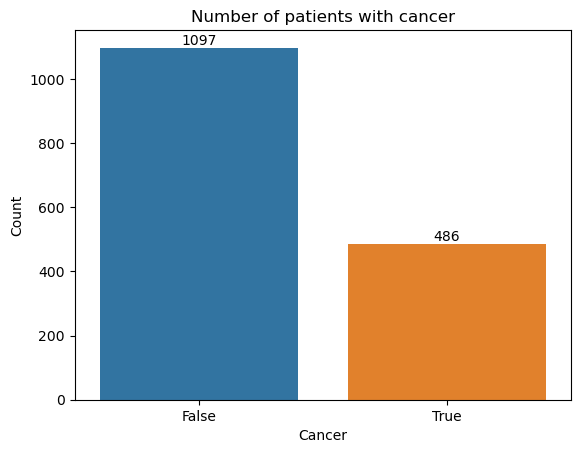

In [42]:
cancer_per_patient = df_balanced.groupby("patient_id")["cancer"].sum().apply(has_cancer)

ax = sns.countplot(x=cancer_per_patient)
ax.bar_label(ax.containers[0])

plt.xlabel("Cancer")
plt.ylabel("Count")
plt.title("Number of patients with cancer")

plt.show()

### Patients age with cancer (positive diagnosis)

Text(0.5, 1.0, 'Patient ages')

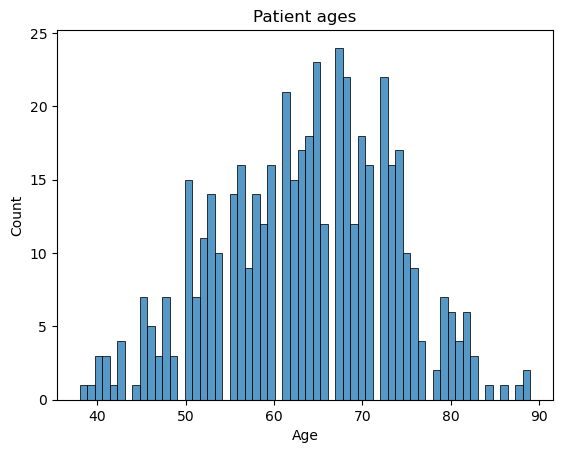

In [27]:
patient_age = cancer[cancer['age'].isnull()==False].groupby("patient_id").age.unique().apply(lambda a: get_age(a))
sns.histplot(patient_age.values, bins=60)
plt.xlabel("Age")
plt.title("Patient ages")

### Patients age without cancer (negative diagnosis)

Text(0.5, 1.0, 'Patient ages')

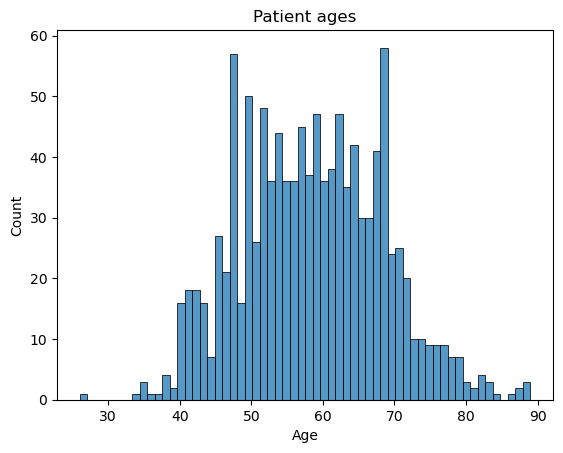

In [28]:
patient_age = nocancer[nocancer['age'].isnull()==False].groupby("patient_id").age.unique().apply(lambda a: get_age(a))
sns.histplot(patient_age.values, bins=60)
plt.xlabel("Age")
plt.title("Patient ages")

In [119]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression


In [157]:
image_path  = Path('png_train_images/')

# Create a list to store the paths
path = []

# Construct the paths
for i in tqdm(range(len(df))):
    row = df.iloc[i, :]
    filename = str(row.patient_id) + "/" +str(row.image_id) + ".png"
    path.append(str(image_path /  filename))  
path[:5]  # Print the first 5 paths as a check

X = []
y = []

  0%|          | 0/54706 [00:00<?, ?it/s]

['png_train_images/10006/462822612.png',
 'png_train_images/10006/1459541791.png',
 'png_train_images/10006/1864590858.png',
 'png_train_images/10006/1874946579.png',
 'png_train_images/10011/220375232.png']

In [167]:
image_path  = 'png_train_images/'
folders = os.listdir(image_path)

In [168]:
train_files = []
target_files = []
for pictures in folders:
    for img in os.listdir(os.path.join(image_path, pictures)):
        train_files.append(os.path.join(image_path, pictures, img))
        target_files.append(pictures)

NotADirectoryError: [Errno 20] Not a directory: 'png_train_images/.DS_Store'

In [158]:
for img_path in path:
    X, y = get_image_label(img_path, df)
    X_ = np.array(X)
    y_ = np.array(y)
    X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=0.2, stratify=y_)


NotADirectoryError: [Errno 20] Not a directory: 'png_train_images/10006/462822612.png'

In [142]:
files = os.listdir(df)
print(files)

TypeError: listdir: path should be string, bytes, os.PathLike, integer or None, not DataFrame

In [143]:
X, y = get_image_label(path, df)
X_ = np.array(X)
y_ = np.array(y)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=0.2, stratify=y_)

TypeError: listdir: path should be string, bytes, os.PathLike, integer or None, not list